In [ ]:
#INSTALL THE KAGGLE LIBRARY

!pip install kaggle

In [ ]:
#CONFIGURE THE KAGGLE.JSON FILE

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#1) IMPORTING THE DATASETS FROM KAGGLE USING API COMMAND(ALREADY CREATED API TOKEN)-COPY THE API COMMAND AND EXECUTE IT USING EXCLAMATION MARK

!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:01<00:00, 124MB/s]
100% 163M/163M [00:01<00:00, 111MB/s]


YOU CAN CHECK THE FILE GOT DOWNLOADED IN THE FILES SECTION IN THE ZIP FILE


In [ ]:
from zipfile import ZipFile
#2) EXTRACT THE ZIP FILE
ds='/content/face-mask-dataset.zip'


In [ ]:
#3) READ THE ZIP FILE TO EXTRACT THE DATA

with ZipFile(ds,'r') as zip:
  zip.extractall()
  print('Dataset Extracted')

Dataset Extracted


In [ ]:
#4) IMPORT THE IBRARIES
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# NECESSARY IMAGE PROCESSING LIBRARIES
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image

In [ ]:
#5) CREATE LISTS TO STORE THE FILES WITH/WITHOUT MASK FOLDER
wmf = os.listdir('/content/data/with_mask')

#PRINT FIRST 5 ELEMENTS
print(wmf[:5])

#PRINT LAST 5 ELEMENTS
print(wmf[-5:])

wtmf = os.listdir('/content/data/without_mask')
print(wtmf[:5])
print(wtmf[-5:])


['with_mask_1385.jpg', 'with_mask_3238.jpg', 'with_mask_384.jpg', 'with_mask_1669.jpg', 'with_mask_2061.jpg']
['with_mask_315.jpg', 'with_mask_2312.jpg', 'with_mask_2751.jpg', 'with_mask_3657.jpg', 'with_mask_2324.jpg']
['without_mask_1533.jpg', 'without_mask_474.jpg', 'without_mask_712.jpg', 'without_mask_1115.jpg', 'without_mask_1723.jpg']
['without_mask_1841.jpg', 'without_mask_1641.jpg', 'without_mask_1024.jpg', 'without_mask_2990.jpg', 'without_mask_373.jpg']


In [ ]:
#6) Number of with/without mask images

print(len(wmf))
print(len(wtmf))

3725
3828


**CREATING LABELS FOR THE MASKED AND WITHOUT MASKED IMAGES WITH 0 & 1**

In [ ]:
#7)CREATE LABELS FOR ALL THE IMAGE TYPES

# MASK -> 1
# WITHOUT MAST -> 0

wm_label = [1]*3725

wtm_label= [0]*3828

# PRINT TOTAL LABELS

labels = wm_label + wtm_label
print(len(labels))

7553


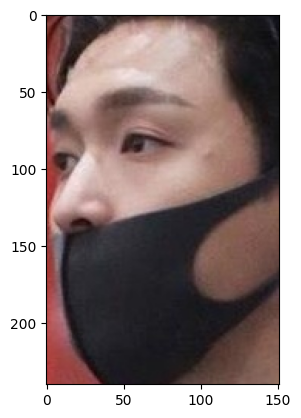

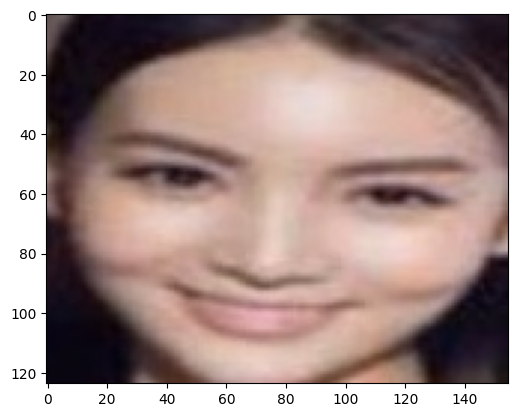

In [ ]:
#8) DISPLAY A MASKED AND WITHOUT MASKED IMAGE BY DIRECTLY COPYING THE PATH

# MASK
img = mpimg.imread('/content/data/with_mask/with_mask_498.jpg')
imgplot = plt.imshow(img)
plt.show()

# WITHOUT MASK
img = mpimg.imread('/content/data/without_mask/without_mask_376.jpg')
imgplot = plt.imshow(img)
plt.show()

WE CAN SEE THE SIZES ARE DIFFERENT SO THEY SHOULD BE RESIZED AND CONVERTED TO ARRAYS(NUMPY)

In [ ]:
#9) # CONVERTING IMAGES TO NUMPY ARRAYS

wmp = '/content/data/with_mask/'

data = []

for img_file in wmf:

  image = Image.open(wmp + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



wtmp = '/content/data/without_mask/'


for img_file in wtmf:

  image = Image.open(wtmp + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


type(data)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


list

In [ ]:
data[0]

array([[[165, 151, 154],
        [116, 104, 108],
        [ 94,  86,  91],
        ...,
        [ 61,  47,  47],
        [ 50,  38,  40],
        [ 42,  31,  34]],

       [[ 97,  86,  86],
        [ 73,  63,  64],
        [ 72,  67,  69],
        ...,
        [ 92,  74,  74],
        [ 77,  61,  61],
        [ 61,  47,  48]],

       [[ 83,  75,  73],
        [ 81,  75,  73],
        [ 61,  59,  58],
        ...,
        [109,  86,  86],
        [101,  81,  79],
        [ 97,  77,  74]],

       ...,

       [[ 18,  12,  21],
        [ 18,  14,  25],
        [ 19,  16,  27],
        ...,
        [  2,  24,  71],
        [  1,  24,  70],
        [  1,  24,  68]],

       [[ 22,  13,  21],
        [ 19,  11,  19],
        [ 18,  14,  22],
        ...,
        [  2,  24,  70],
        [  2,  25,  69],
        [  1,  23,  71]],

       [[ 25,  12,  19],
        [ 22,  11,  17],
        [ 19,  12,  20],
        ...,
        [  2,  25,  69],
        [  3,  26,  70],
        [  3,  25,  72]]

ALL THESE ARE PIXEL VALUES RANGING FROM 0-255, SO AFTER CONVERTING TO NUMPY ARRAYS THEY GOT CONVERTED TO 3 MATRICIES SUCH AS RED, GREEN BLUE INTENSITY VALUES.

In [ ]:
#10) CHECK THE SHAPE THE DATA(height, width, color channel)

data[0].shape

(128, 128, 3)

THE DATA IS A LIST CONTAINING 7553 IMAGES IN THE FORM OF NUMPY ARRAYS

In [ ]:
#11) CONVERT IMAGE AND LABEL LIST AS WELL TO NUMPY ARRAYS

X = np.array(data)
Y = np.array(labels)

print(type(X))
print(type(Y))

print(X.shape)
print(Y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(7553, 128, 128, 3)
(7553,)


In [ ]:
#12) TRAIN TEST SPLITTING

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#13) SCALING THE DATA: PURPOSE IS TO SCALE DOWN THE RGB VALUES SUCH THAT WHITE COLOR IS REPRESENTED AS 1 AND BLACK AS 0. SO ALL THE VALUES LIES BETWEEN 1 AND 0

X_train_scaled = X_train/255
X_test_scaled = X_test/255

print(X_train_scaled[0])

[[[0.15686275 0.18431373 0.21568627]
  [0.07058824 0.10196078 0.13333333]
  [0.01176471 0.04313725 0.08627451]
  ...
  [0.00392157 0.02745098 0.09411765]
  [0.02352941 0.04313725 0.11764706]
  [0.07058824 0.09411765 0.16862745]]

 [[0.12941176 0.15686275 0.19607843]
  [0.03921569 0.07058824 0.10980392]
  [0.         0.02745098 0.06666667]
  ...
  [0.01960784 0.04313725 0.10588235]
  [0.03921569 0.05490196 0.1254902 ]
  [0.05098039 0.06666667 0.14117647]]

 [[0.         0.03137255 0.07843137]
  [0.         0.03137255 0.07058824]
  [0.00392157 0.03921569 0.07843137]
  ...
  [0.01960784 0.03137255 0.09019608]
  [0.01176471 0.02352941 0.09019608]
  [0.03529412 0.04705882 0.10980392]]

 ...

 [[0.10980392 0.16078431 0.23529412]
  [0.10588235 0.14509804 0.21176471]
  [0.15686275 0.17647059 0.21176471]
  ...
  [0.79607843 0.61176471 0.50980392]
  [0.80784314 0.63137255 0.50588235]
  [0.76862745 0.58823529 0.45882353]]

 [[0.09803922 0.15686275 0.22745098]
  [0.08235294 0.12941176 0.19215686]


In [ ]:
#14) BULDING CONVOLUTIONAL NEURAL NETWORK

no_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(no_of_classes, activation='sigmoid'))

#15) COMPILE THE NEURAL NETWORK
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc'])


In [ ]:
#15) TRAINING THE NEURAL NETWORK
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 17s 21ms/step - loss: 0.4488 - acc: 0.8014 - val_loss: 0.2820 - val_acc: 0.8810
Epoch 2/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2963 - acc: 0.8773 - val_loss: 0.3195 - val_acc: 0.8826
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2456 - acc: 0.9066 - val_loss: 0.1883 - val_acc: 0.9174
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1929 - acc: 0.9218 - val_loss: 0.1901 - val_acc: 0.9190
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1704 - acc: 0.9380 - val_loss: 0.2008 - val_acc: 0.9223


In [ ]:
#16) LOSS AND ACCURACY
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 9ms/step - loss: 0.2288 - acc: 0.9186
Test Accuracy = 0.9185969829559326


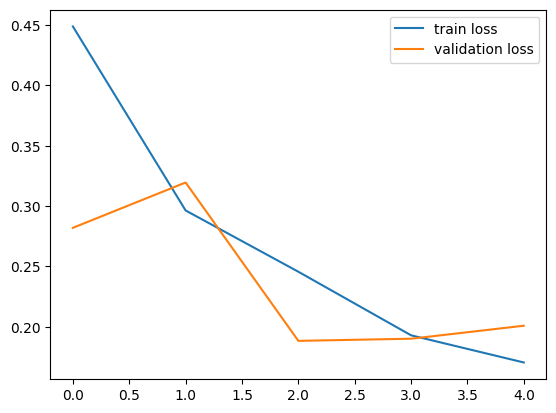

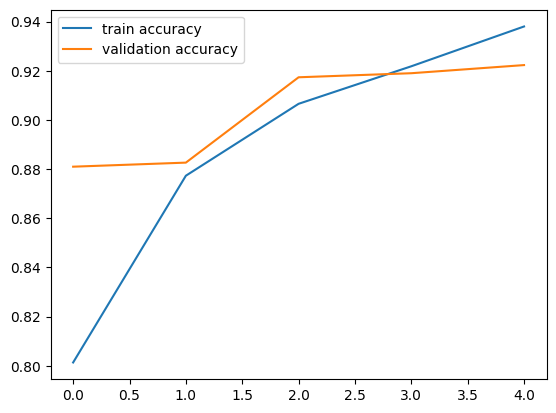

In [34]:
#17) VISUALIZING LOSS AND ACCURACY
h = history

#
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/img_with_mask.jpg


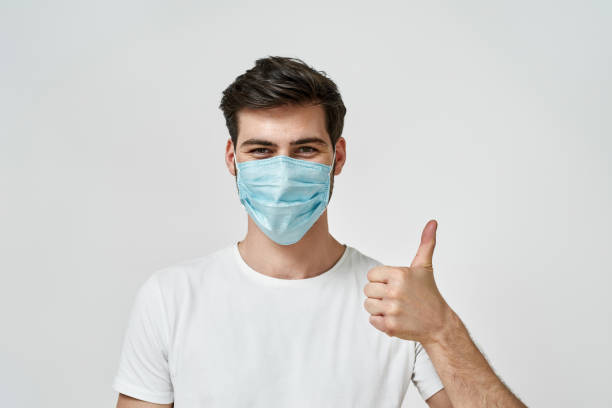

1/1 [==============================] - 0s 31ms/step
[[0.2903196 0.6697732]]
1
The person in the image is wearing a mask


In [35]:
#18) PREDICTIVE SYSTEM

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/Andrzej_Person_Kancelaria_Senatu_2005.jpg


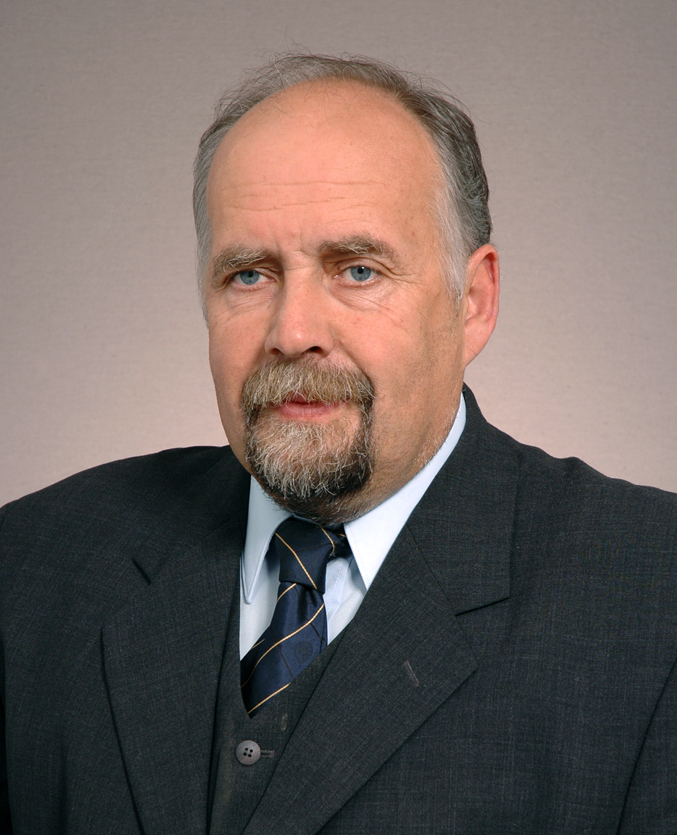

1/1 [==============================] - 0s 34ms/step
[[0.48641482 0.47703657]]
0
The person in the image is not wearing a mask


In [36]:
#18) PREDICTIVE SYSTEM

input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')

else:
  print('The person in the image is not wearing a mask')